
# <center> Practice Case Tweets Modelling 

## Data Information
- The dataset used is a dataset from Twitter that has been cleaned.
- This data has 2 features named text and targets containing 1600000 records.

## Modeling Objectives
- To predict whether the incoming tweet is a positive or negative tweet

## Import Library

In [47]:
import warnings
warnings.filterwarnings("ignore") 
import pandas as pd 
import numpy as np 
import nltk 
nltk.download('stopwords')
#import nltk for natural language toolkit
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

from nltk.corpus import stopwords
import tqdm
#import tqdm 
from tqdm import tqdm 
tqdm.pandas()

#import string, regex, , uniqcode
import re, string, unicodedata

#import sklearn preprocessing 
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

#import sklearn for modeling
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#import sklearn for model evaluation 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#import visualization module 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS


#import beaurtiful soup 
from bs4 import BeautifulSoup

#save model 
import pickle 

#textblob
from textblob import Word
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fransd064180\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Load Dataset

In [2]:
data=pd.read_csv('clean_tweet.csv')
data.head()

,text,target
0,awww that s a bummer you shoulda got david car...,0
1,is upset that he can t update his facebook by ...,0
2,i dived many times for the ball managed to sav...,0
3,my whole body feels itchy and like its on fire,0
4,no it s not behaving at all i m mad why am i h...,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
text      1596753 non-null object
target    1600000 non-null int64
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


- From the info function, it can be seen that this dataset contains  1600000 records with the features are text in the form of tweets and feature targets in the form of 1 and 0.
- Feature Target is feature sentiment. Value 1 is Positive sentiment, while 0 is negative sentiment

## Check Missing Value

In [4]:
data.isna().sum()

text      3247
target       0
dtype: int64

- There are 3247 missing values in the data 
- These Missing values will be deleted from the data

In [5]:
data=data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1596753 entries, 0 to 1599999
Data columns (total 2 columns):
text      1596753 non-null object
target    1596753 non-null int64
dtypes: int64(1), object(1)
memory usage: 36.5+ MB


### Drop Duplicate Tweet

In [6]:
data=data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1528140 entries, 0 to 1599999
Data columns (total 2 columns):
text      1528140 non-null object
target    1528140 non-null int64
dtypes: int64(1), object(1)
memory usage: 35.0+ MB


# Target Proportion

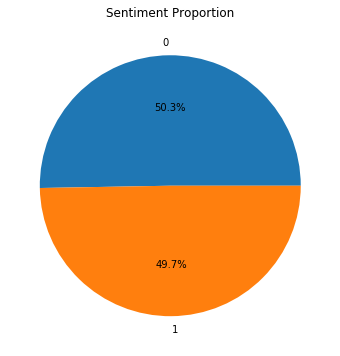

In [7]:
target=pd.DataFrame(data['target'].value_counts())
plt.figure(figsize=(6,6))
plt.pie(target,labels=target.index, autopct='%1.1f%%')
plt.title('Sentiment Proportion')
plt.show()


From the Pie chart above, it's seen that the proportion of negative and positive sentiment is balanced on this data

---

# Data Preprocessing

Before doing Visualization or Modeling, data processing should be done so the results wii be getting better. Data processing for text data differs from ordinary tabular data processing.
The steps for preprocess the text data are:
- Lower Casing
- Punctutation Removal
- Spelling Correction
- Stemming
- Lematization

### A. Lower Casing

The first preprocess is to make all words lower form

In [8]:
data['text'] = data['text'].str.lower()
data['text'].head()

0    awww that s a bummer you shoulda got david car...
1    is upset that he can t update his facebook by ...
2    i dived many times for the ball managed to sav...
3       my whole body feels itchy and like its on fire
4    no it s not behaving at all i m mad why am i h...
Name: text, dtype: object

### B. Punctuation Removal

Punctuation Removal is used to remove punctuation in text data such as "?[]()! , . :"

In [9]:
data['text'] = data['text'].str.replace('[^\w\s]','')
data.head()

,text,target
0,awww that s a bummer you shoulda got david car...,0
1,is upset that he can t update his facebook by ...,0
2,i dived many times for the ball managed to sav...,0
3,my whole body feels itchy and like its on fire,0
4,no it s not behaving at all i m mad why am i h...,0


### F. Stopwords Removal

In [10]:
stop = stopwords.words('english')
data['text'] = data['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data['text'].head(10)

0         awww bummer shoulda got david carr third day
1    upset update facebook texting might cry result...
2    dived many times ball managed save rest go bounds
3                     whole body feels itchy like fire
4                                     behaving mad see
5                                           whole crew
6                                             need hug
7    hey long time see yes rains bit bit lol fine t...
8                                               k nope
9                                            que muera
Name: text, dtype: object

### G. Frequent Words Removal

In [11]:
freq = pd.Series(' '.join(data['text']).split()).value_counts()[:10]
freq

good     86416
day      85998
get      80243
like     77569
go       72813
today    67343
going    63679
love     63269
work     62521
got      60636
dtype: int64

In [12]:
freq = list(freq.index)
data['text'] = data['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data['text'].head()

0                 awww bummer shoulda david carr third
1    upset update facebook texting might cry result...
2       dived many times ball managed save rest bounds
3                          whole body feels itchy fire
4                                     behaving mad see
Name: text, dtype: object

### Rare Words Removal

In [13]:
rare_word = pd.Series(' '.join(data['text']).split()).value_counts()[-10:]
rare_word

mwlx             1
neutrons         1
meeeeooooowww    1
ebe              1
spendd           1
alsum            1
fritzd           1
livigne          1
lazenby          1
longwayround     1
dtype: int64

In [14]:
rare_word = list(rare_word.index)
data['text'] = data['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data['text'].head()

0                 awww bummer shoulda david carr third
1    upset update facebook texting might cry result...
2       dived many times ball managed save rest bounds
3                          whole body feels itchy fire
4                                     behaving mad see
Name: text, dtype: object

### C. Spelling Correction

Spelling Correction is used to change typo words into standard words

In [23]:
#import textblob 
#from textblob import TextBlob
#data['text'].apply(lambda x: str(TextBlob(x).correct()))

### D. Tokenization

In [ ]:
TextBlob(data['text'][1]).words

### D. Stemming

Stemming is used to change affixed words into basic words

In [ ]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
data['text'] = data['text'][:].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

### E. Lematization

Lematization is used to remove words that are not standard in the dataset

In [ ]:
from textblob import Word
dataframe['text'] = dataframe['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
dataframe['text'].head()

# Data Exploration

Data exploration is used to find the characteristics of the data. From this test, we will look for characteristics of interesting charts. 
### <br>Data Exploration Line:
1. Words and Character's count distribution using Histogram
2. Word's Frequent using WordCloud

### Number of Words

In [15]:
data['word_count'] = data['text'].apply(lambda x: len(str(x).split(" ")))
data.head()

,text,target,word_count
0,awww bummer shoulda david carr third,0,6
1,upset update facebook texting might cry result...,0,10
2,dived many times ball managed save rest bounds,0,8
3,whole body feels itchy fire,0,5
4,behaving mad see,0,3


### Number of Charachter

In [16]:
data['char_count'] = data['text'].str.len()
data.head()

,text,target,word_count,char_count
0,awww bummer shoulda david carr third,0,6,36
1,upset update facebook texting might cry result...,0,10,63
2,dived many times ball managed save rest bounds,0,8,46
3,whole body feels itchy fire,0,5,27
4,behaving mad see,0,3,16


### Distributions of Word Count and Char Count using Histogram 

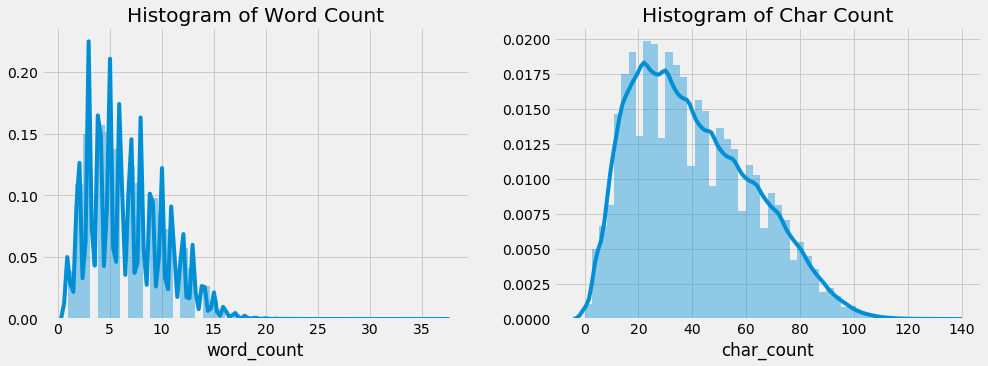

In [31]:
plt.style.use('fivethirtyeight')
f=plt.figure(figsize=(15,5))
f.add_subplot(1,2,1)
sns.distplot(data['word_count'])
plt.title('Histogram of Word Count')
f.add_subplot(1,2,2)
sns.distplot(data['char_count'])
plt.title('Histogram of Char Count')
plt.show()

# Wordcloud of Sentiment 

A word cloud is a popular visualization of words typically associated with tweet keywords and text data. They are most commonly used to highlight popular or trending terms based on frequency of use and prominence. A word cloud is a beautiful, informative image that communicates much in a single glance.

In [32]:
from PIL import Image
import os
from os import path

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# read the mask image
mask = np.array(Image.open(path.join(d,"twitter_mask.png")))

df_all=data
words_all = ' '.join(data['text'])
cleaned_word_all = " ".join([word_all for word_all in words_all.split()
                            if 'http' not in word_all
                                and not word_all.startswith('@')
                                and word_all != 'RT'])
wordcloud_all = WordCloud(mask=mask, 
                          font_path='CabinSketch-Bold.ttf',
                          stopwords=STOPWORDS, 
                          background_color='white', 
                          contour_width=3, 
                          contour_color='steelblue',
                          width=6000, 
                          height=6000).generate(cleaned_word_all)


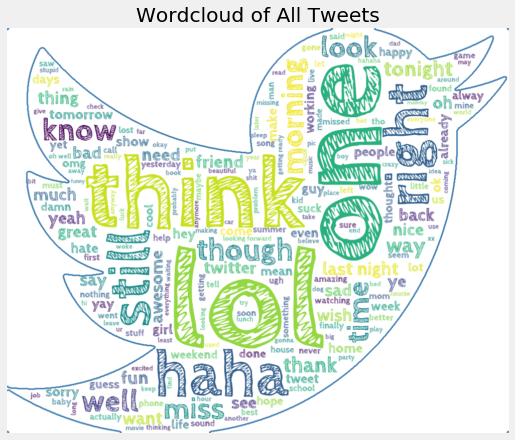

In [36]:
# store to file
#wc.to_file(path.join(d, "tweet.png"))

# show
plt.figure(figsize=(8,8))
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.axis("off")
plt.title('Wordcloud of All Tweets')
plt.show()



From all the tweets data, the words most often mentioned are 'think', 'lol', 'one', and 'hahaha'. It can be said that Twitter users often talk about their opinion and joke in twitter so that they use words like 'think' and 'lol' and 'hahaha'

In [37]:
#define negative, positive, and neutral 
negative = data.loc[data['target'] == 0]['text']
positive  = data.loc[data['target'] == 1]['text']
#merge all the sentiment comments into one paragraph
all_description_negative = "".join(negative.values)
all_description_positive = "".join(positive.values)


## Wordcloud for  Sentiment (Positive and Negative)

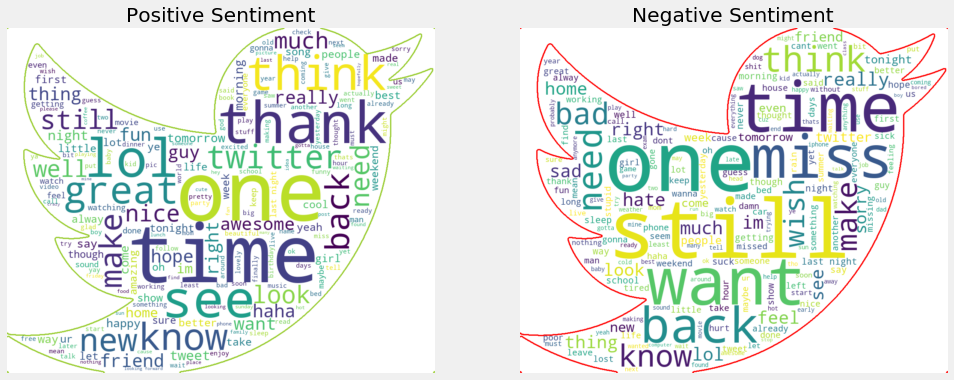

In [55]:
f=plt.figure(figsize=(15,10))
f.add_subplot(1,2,1)
mask = np.array(Image.open("twitter_mask.png"))
colors=ImageColorGenerator(mask)
cloud = WordCloud(background_color = "white", 
                  mask = mask, 
                  #color_func = colors,
                  contour_width = 2, 
                  contour_color = 'yellowgreen', 
                  max_words = 200,
                  stopwords = set(STOPWORDS)).generate(all_description_positive)
#plt.figure(figsize = (15, 8))
plt.imshow(cloud, interpolation = 'bilinear')
plt.title('Positive Sentiment')
plt.axis('off')

f.add_subplot(1,2,2)
cloud = WordCloud(background_color = "white", 
                  mask = mask, 
                  #color_func = colors,
                  contour_width = 2, 
                  contour_color = 'red', 
                  max_words = 200,
                  stopwords = set(STOPWORDS)).generate(all_description_negative)
#plt.figure(figsize = (15, 8))
plt.imshow(cloud, interpolation = 'bilinear')
plt.title('Negative Sentiment')
plt.axis('off')

plt.show()

Here is a wordcloud for each sentiment. Can be seen for positive sentiment, the words most widely spoken are 'time', 'thank', 'lol' and 'great', so it can be said that positive sentiment here is like giving thanks or giving praise, for the example word 'great'

# Modelling
## Steps for Modelling :
- Define X and y
- Feature Extraction (Count Vectorizer, TF-IDF)
- Split Data Training and Testing
- Modelling
- Hyperparameter Tuning
- Evaluation

## A. Define X and y

In [56]:
X = data['text']
y = data['target']

## B. Feature Extraction

#### Count Vectorizer

The most straightforward one, it counts the number of times a token shows up in the document and uses this value as its weight.

CountVectorizer builds a count matrix where rows are occurrences counts of different words taking into account the high-dimensional sparsity.


In [57]:
count_vectorizer = CountVectorizer(stop_words='english')

#### TF-IDF

TF-IDF stands for “term frequency-inverse document frequency”, meaning the weight assigned to each token not only depends on its frequency in a document but also how recurrent that term is in the entire corpora. 

Tf-idf stands for term frequency-inverse document frequency, and the tf-idf weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. Variations of the tf-idf weighting scheme are often used by search engines as a central tool in scoring and ranking a document's relevance given a user query.

In [58]:
tfidf = TfidfVectorizer(stop_words='english' )

In [74]:
#countvectorizer
X_vectorizer = count_vectorizer.fit_transform(X)

X_tfidf = tfidf.fit_transform(X)

## Split Data Training and Data testing with Proportion 70% and 30%

In [76]:
#train test split using countvectorizer 
train_X_vectorizer, test_X_vectorizer, train_y, test_y = train_test_split(X_vectorizer, y, test_size=0.3, random_state=7)

#train test split using tfidfvectorizer 
train_X_tfidf, test_X_tfidf, train_y, test_y = train_test_split(X_tfidf, y, test_size=0.3, random_state=7)

## Machine Learning Modelling
Machine Learning Algorithm that will be used to predict the Sentiment are 
1. Logistics Regression
2. Multinomial Naive Bayes

## Evaluation
Evaluasi yang akan digunakan adalah Akurasi, precision, dan recall untuk menentukan model mana yang terbaik untuk memprediksi sentiment 

### A. Logistics Regression

In [77]:
# Countvectorizer 
Lr_vect = LogisticRegression(penalty='l2')
Lr_vect.fit(train_X_vectorizer,train_y)
Lr_pred_vect_train = Lr_vect.predict(train_X_vectorizer)
Lr_pred_vect_test = Lr_vect.predict(test_X_vectorizer)

In [78]:
# TFIDFVectorizer
Lr_tfidf = LogisticRegression(penalty='l2')
Lr_tfidf.fit(train_X_tfidf,train_y)
Lr_pred_tfidf_train = Lr_tfidf.predict(train_X_tfidf)
Lr_pred_tfidf_test = Lr_tfidf.predict(test_X_tfidf)

In [79]:
# using count vectorizer
print("______________ Countvectorizer ______________")

lr_accuracy_vect_train=Lr_vect.score(train_X_vectorizer,train_y)
lr_accuracy_vect_test=Lr_vect.score(test_X_vectorizer,test_y)

Lr_recall_vec_train = recall_score(train_y, Lr_pred_vect_train)
Lr_recall_vec_test = recall_score(test_y, Lr_pred_vect_test) 

Lr_precision_vec_train = precision_score(train_y, Lr_pred_vect_train)
Lr_precision_vec_test = precision_score(test_y, Lr_pred_vect_test)

Lr_f1_score_vec_train = f1_score(train_y, Lr_pred_vect_train)
Lr_f1_score_vec_test = f1_score(test_y,Lr_pred_vect_test)


print('Information :')
print('Accuracy train & test   : %.2f%%' % (lr_accuracy_vect_train * 100), '&', '%.2f%%' % (lr_accuracy_vect_test * 100))
print('Recall train & test     : %.2f%%' % (Lr_recall_vec_train * 100), '&', '%.2f%%' % (Lr_recall_vec_test * 100))
print('Precision train & test  : %.2f%%' % (Lr_precision_vec_train * 100), '&', '%.2f%%' % (Lr_precision_vec_test * 100))
print('F1 Score train & test   : %.2f%%' % (Lr_f1_score_vec_train * 100), '&', '%.2f%%' % (Lr_f1_score_vec_test * 100))

______________ Countvectorizer ______________
Information :
Accuracy train & test   : 80.02% & 76.17%
Recall train & test     : 82.54% & 78.93%
Precision train & test  : 78.44% & 74.56%
F1 Score train & test   : 80.44% & 76.69%


In [80]:
# using count vectorizer
print("______________ TF-IDF ______________")

lr_accuracy_tfidf_train=Lr_tfidf.score(train_X_tfidf,train_y)
lr_accuracy_tfidf_test=Lr_tfidf.score(test_X_tfidf,test_y)

Lr_recall_tfidf_train = recall_score(train_y, Lr_pred_tfidf_train, average="micro")
Lr_recall_tfidf_test = recall_score(test_y, Lr_pred_tfidf_test,average="micro") 

Lr_precision_tfidf_train = precision_score(train_y, Lr_pred_tfidf_train,average="micro")
Lr_precision_tfidf_test = precision_score(test_y, Lr_pred_tfidf_test,average="micro")

Lr_f1_score_tfidf_train = f1_score(train_y, Lr_pred_tfidf_train,average="micro")
Lr_f1_score_tfidf_test = f1_score(test_y,Lr_pred_tfidf_test,average="micro")

print('Information :')
print('Accuracy train & test   : %.2f%%' % (lr_accuracy_tfidf_train * 100), '&', '%.2f%%' % (lr_accuracy_tfidf_test * 100))
print('Recall train & test     : %.2f%%' % (Lr_recall_tfidf_train * 100), '&', '%.2f%%' % (Lr_recall_tfidf_test * 100))
print('Precision train & test  : %.2f%%' % (Lr_precision_tfidf_train * 100), '&', '%.2f%%' % (Lr_precision_tfidf_test * 100))
print('F1 Score train & test   : %.2f%%' % (Lr_f1_score_tfidf_train * 100), '&', '%.2f%%' % (Lr_f1_score_vec_test * 100))

______________ TF-IDF ______________
Information :
Accuracy train & test   : 79.05% & 76.40%
Recall train & test     : 79.05% & 76.40%
Precision train & test  : 79.05% & 76.40%
F1 Score train & test   : 79.05% & 76.69%


## Naive Bayes

In [81]:
# Countvectorizer
NB_vect = MultinomialNB()
NB_vect.fit(train_X_vectorizer,train_y)
NB_pred_vect_train = NB_vect.predict(train_X_vectorizer)
NB_pred_vect_test = NB_vect.predict(test_X_vectorizer)

In [82]:
# TFIDFVectorizer
#from sklearn.naive_bayes import GaussianNB
NB_tfidf = MultinomialNB()
NB_tfidf.fit(train_X_tfidf,train_y)
NB_pred_tfidf_train = NB_tfidf.predict(train_X_tfidf)
NB_pred_tfidf_test = NB_tfidf.predict(test_X_tfidf)

In [85]:
# find model evaluation for naive bayes
# using count vectorizer
print("______________ Countvectorizer ______________")

NB_accuracy_vec_train=NB_vect.score(train_X_vectorizer,train_y)
NB_accuracy_vec_test=NB_vect.score(test_X_vectorizer,test_y)

NB_recall_vec_train = recall_score(train_y, NB_pred_vect_train, average="micro")
NB_recall_vec_test = recall_score(test_y, NB_pred_vect_test,average="micro") 

NB_precision_vec_train = precision_score(train_y, NB_pred_vect_train,average="micro")
NB_precision_vec_test = precision_score(test_y, NB_pred_vect_test,average="micro")

NB_f1_score_vec_train = f1_score(train_y, NB_pred_vect_train,average="micro")
NB_f1_score_vec_test = f1_score(test_y,NB_pred_vect_test,average="micro")

print('Information :')
print('Accuracy train & test   : %.2f%%' % (NB_accuracy_vec_train * 100), '&', '%.2f%%' % (NB_accuracy_vec_test * 100))
print('Recall train & test     : %.2f%%' % (NB_recall_vec_train * 100), '&', '%.2f%%' % (NB_recall_vec_test * 100))
print('Precision train & test  : %.2f%%' % (NB_precision_vec_train * 100), '&', '%.2f%%' % (NB_precision_vec_test * 100))
print('F1 Score train & test   : %.2f%%' % (NB_f1_score_vec_train * 100), '&', '%.2f%%' % (NB_f1_score_vec_test * 100))

______________ Countvectorizer ______________
Information :
Accuracy train & test   : 78.79% & 75.51%
Recall train & test     : 78.79% & 75.51%
Precision train & test  : 78.79% & 75.51%
F1 Score train & test   : 78.79% & 75.51%


In [84]:
# using count vectorizer
print("______________ TF-IDF ______________")

NB_accuracy_tfidf_train=Lr_tfidf.score(train_X_tfidf,train_y)
NB_accuracy_tfidf_test=Lr_tfidf.score(test_X_tfidf,test_y)

NB_recall_tfidf_train = recall_score(train_y, NB_pred_tfidf_train, average="micro")
NB_recall_tfidf_test = recall_score(test_y, NB_pred_tfidf_test,average="micro") 

NB_precision_tfidf_train = precision_score(train_y, NB_pred_tfidf_train,average="micro")
NB_precision_tfidf_test = precision_score(test_y, NB_pred_tfidf_test,average="micro")

NB_f1_score_tfidf_train = f1_score(train_y, NB_pred_tfidf_train,average="micro")
NB_f1_score_tfidf_test = f1_score(test_y,NB_pred_tfidf_test,average="micro")

print('Information :')
print('Accuracy train & test   : %.2f%%' % (NB_accuracy_tfidf_train * 100), '&', '%.2f%%' % (NB_accuracy_tfidf_test * 100))
print('Recall train & test     : %.2f%%' % (NB_recall_tfidf_train * 100), '&', '%.2f%%' % (NB_recall_tfidf_test * 100))
print('Precision train & test  : %.2f%%' % (NB_precision_tfidf_train * 100), '&', '%.2f%%' % (NB_precision_tfidf_test * 100))
print('F1 Score train & test   : %.2f%%' % (NB_f1_score_tfidf_train * 100), '&', '%.2f%%' % (NB_f1_score_vec_test * 100))

______________ TF-IDF ______________
Information :
Accuracy train & test   : 79.05% & 76.40%
Recall train & test     : 78.79% & 74.85%
Precision train & test  : 78.79% & 74.85%
F1 Score train & test   : 78.79% & 75.51%


## Model Evaluation

In [87]:
print('Logistics Regression - CountVectorizer')
print('Accuracy train & test   : %.2f%%' % (lr_accuracy_vect_train * 100), '&', '%.2f%%' % (lr_accuracy_vect_test * 100))
print('Recall train & test     : %.2f%%' % (Lr_recall_vec_train * 100), '&', '%.2f%%' % (Lr_recall_vec_test * 100))
print('Precision train & test  : %.2f%%' % (Lr_precision_vec_train * 100), '&', '%.2f%%' % (Lr_precision_vec_test * 100))
print('F1 Score train & test   : %.2f%%' % (Lr_f1_score_vec_train * 100), '&', '%.2f%%' % (Lr_f1_score_vec_test * 100))
print()
print('Logistics Regression - TF-IDF')
print('Accuracy train & test   : %.2f%%' % (lr_accuracy_tfidf_train * 100), '&', '%.2f%%' % (lr_accuracy_tfidf_test * 100))
print('Recall train & test     : %.2f%%' % (Lr_recall_tfidf_train * 100), '&', '%.2f%%' % (Lr_recall_tfidf_test * 100))
print('Precision train & test  : %.2f%%' % (Lr_precision_tfidf_train * 100), '&', '%.2f%%' % (Lr_precision_tfidf_test * 100))
print('F1 Score train & test   : %.2f%%' % (Lr_f1_score_tfidf_train * 100), '&', '%.2f%%' % (Lr_f1_score_vec_test * 100))
print()
print('NaiveBayes - CountVectorizer')
print('Accuracy train & test   : %.2f%%' % (NB_accuracy_vec_train * 100), '&', '%.2f%%' % (NB_accuracy_vec_test * 100))
print('Recall train & test     : %.2f%%' % (NB_recall_vec_train * 100), '&', '%.2f%%' % (NB_recall_vec_test * 100))
print('Precision train & test  : %.2f%%' % (NB_precision_vec_train * 100), '&', '%.2f%%' % (NB_precision_vec_test * 100))
print('F1 Score train & test   : %.2f%%' % (NB_f1_score_vec_train * 100), '&', '%.2f%%' % (NB_f1_score_vec_test * 100))
print()
print('NaiveBayes - TF-IDF')
print('Accuracy train & test   : %.2f%%' % (NB_accuracy_tfidf_train * 100), '&', '%.2f%%' % (NB_accuracy_tfidf_test * 100))
print('Recall train & test     : %.2f%%' % (NB_recall_tfidf_train * 100), '&', '%.2f%%' % (NB_recall_tfidf_test * 100))
print('Precision train & test  : %.2f%%' % (NB_precision_tfidf_train * 100), '&', '%.2f%%' % (NB_precision_tfidf_test * 100))
print('F1 Score train & test   : %.2f%%' % (NB_f1_score_tfidf_train * 100), '&', '%.2f%%' % (NB_f1_score_vec_test * 100))

Logistics Regression - CountVectorizer
Accuracy train & test   : 80.02% & 76.17%
Recall train & test     : 82.54% & 78.93%
Precision train & test  : 78.44% & 74.56%
F1 Score train & test   : 80.44% & 76.69%

Logistics Regression - TF-IDF
Accuracy train & test   : 79.05% & 76.40%
Recall train & test     : 79.05% & 76.40%
Precision train & test  : 79.05% & 76.40%
F1 Score train & test   : 79.05% & 76.69%

NaiveBayes - CountVectorizer
Accuracy train & test   : 78.79% & 75.51%
Recall train & test     : 78.79% & 75.51%
Precision train & test  : 78.79% & 75.51%
F1 Score train & test   : 78.79% & 75.51%

NaiveBayes - TF-IDF
Accuracy train & test   : 79.05% & 76.40%
Recall train & test     : 78.79% & 74.85%
Precision train & test  : 78.79% & 74.85%
F1 Score train & test   : 78.79% & 75.51%


From the model evaluation above, it can be said that the model that provides the best evaluation results is the Logistics Regression with CountVectorizer as the Feature Extraction. Therefore, this model will be Tuned to find the optimal Parameter to improve the accuracy.

# Tuning Parameter Logistics Regression

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV            
p_test3 = {'penalty':['l1','l2'], 'C':[0.01,0.1,1,5,10]}

tuning = GridSearchCV(estimator =LogisticRegression(), 
            param_grid = p_test3, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(train_X_vectorizer,train_y)
tuning.best_params_, tuning.best_score_

({'C': 1, 'penalty': 'l1'}, 0.7757628375596751)

After tuning the parameters, the best parameters are obtained, are Penalty = l1 and C = 1.
<br>This model will be used to predict wheather sentiment's tweet are positive or negative

# Model Evaluation Using Confusion Matrix and ROC Curve

              precision    recall  f1-score   support

           0       0.77      0.79      0.78    159771
           1       0.78      0.76      0.77    159580

   micro avg       0.77      0.77      0.77    319351
   macro avg       0.77      0.77      0.77    319351
weighted avg       0.77      0.77      0.77    319351

Accuracy   : 77.34530344354644
Recall     : 75.93307432009023
Precision  : 78.11831145723201
AUC        : 77.34445931112384


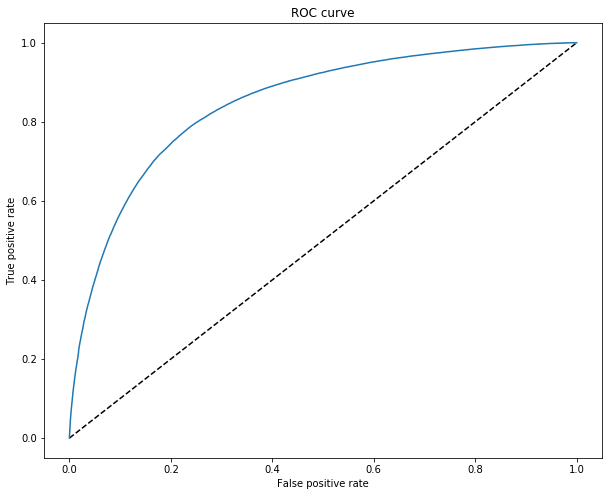

In [39]:
from sklearn.metrics import roc_curve

def plot_roc_curve(ytest, P_ensemble):
    """Plot the roc curve for base learners and ensemble."""
    plt.figure(figsize=(10, 8))
    plt.plot([0, 1], [0, 1], 'k--')

    fpr, tpr, _ = roc_curve(test_y, P_ensemble)
    plt.plot(fpr, tpr)
        
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.show()

print(classification_report(test_y,Lr_Pred))
print('Accuracy   :',accuracy_score(test_y,Lr_Pred)*100)
print('Recall     :',recall_score(test_y,Lr_Pred)*100)
print('Precision  :',precision_score(test_y,Lr_Pred)*100)
print('AUC        :',roc_auc_score(test_y,Lr_Pred)*100)

y_pred_proba=Lr_tfidf.predict_proba(test_X_vectorizer)
plot_roc_curve(test_y,y_pred_proba[:,1])

# Conclusion
1. The conclusion obtained from the results of visualization and modeling of this data is that the text data needs to did several preprocessing data before modeling or visualization.
2. There are two feature extractions used, they are Countvectorizer and TF-IDF, from these two methods it will be seen which feature extraction gives the best results when modeling.
3. There are 2 models used, Logistics Regression and Multinomial Naive Bayes. The model with the highest evaluation is Regression Logistics with the Feature Extraction is CountVectorizer
4. After getting the best model, Tuning Parameters will be done to improve the accuracy results. The tuned parameter that given the best result for the model are Penalty = l1 and C = 1.

# Future Works

Due to the available data is very large and laptop capacities are inadequate for modeling with various algorithms, so I plan to sample the tweet data so that the size becomes smaller and faster and easier to do modeling with various algorithms.

# Thanks
Created by : Fransdana Nadeak